In [77]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, pipeline, metrics
from sklearn.model_selection import GridSearchCV

In [78]:
import pandas as pd

data = {
    'tra': pd.read_csv('air_visit_data.csv.zip'),
    'as': pd.read_csv('air_store_info.csv.zip'),
    'hs': pd.read_csv('hpg_store_info.csv.zip'),
    'ar': pd.read_csv('air_reserve.csv.zip'),
    'hr': pd.read_csv('hpg_reserve.csv.zip'),
    'id': pd.read_csv('store_id_relation.csv.zip'),
    'tes': pd.read_csv('sample_submission.csv.zip'),
    'hol': pd.read_csv('date_info.csv.zip').rename(columns={
        'calendar_date': 'visit_date'
    })
}

display(data['hr'].head())
display(data['id'].head())
display(data['ar'].head())


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [79]:
data['tra']['visit_date'] = pd.to_datetime(data['tra']['visit_date'])
data['tra']['dow'] = data['tra']['visit_date'].dt.dayofweek
data['tra']['year'] = data['tra']['visit_date'].dt.year
data['tra']['month'] = data['tra']['visit_date'].dt.month
data['tra']['visit_date'] = data['tra']['visit_date'].dt.date

data['tra'].head(20)

,air_store_id,visit_date,visitors,dow,year,month
0,air_ba937bf13d40fb24,2016-01-13,25,2,2016,1
1,air_ba937bf13d40fb24,2016-01-14,32,3,2016,1
2,air_ba937bf13d40fb24,2016-01-15,29,4,2016,1
3,air_ba937bf13d40fb24,2016-01-16,22,5,2016,1
4,air_ba937bf13d40fb24,2016-01-18,6,0,2016,1
5,air_ba937bf13d40fb24,2016-01-19,9,1,2016,1
6,air_ba937bf13d40fb24,2016-01-20,31,2,2016,1
7,air_ba937bf13d40fb24,2016-01-21,21,3,2016,1
8,air_ba937bf13d40fb24,2016-01-22,18,4,2016,1
9,air_ba937bf13d40fb24,2016-01-23,26,5,2016,1


In [80]:
groupedData = data['tra'].groupby('dow')['visitors'].transform('mean')

In [81]:
print(groupedData)

0         19.230121
1         18.922702
2         23.072737
3         26.313688
4         17.177009
            ...    
252103    17.672137
252104    19.230121
252105    18.922702
252106    23.072737
252107    26.313688
Name: visitors, Length: 252108, dtype: float64


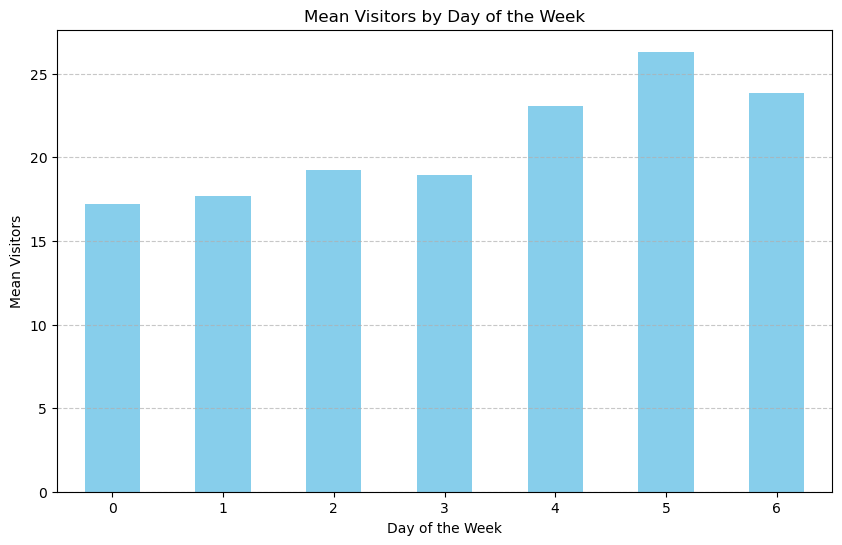

In [82]:
mean_visitors_by_dow = data['tra'].groupby('dow')['visitors'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_visitors_by_dow.plot(kind='bar', color='skyblue')
plt.title('Mean Visitors by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Visitors')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

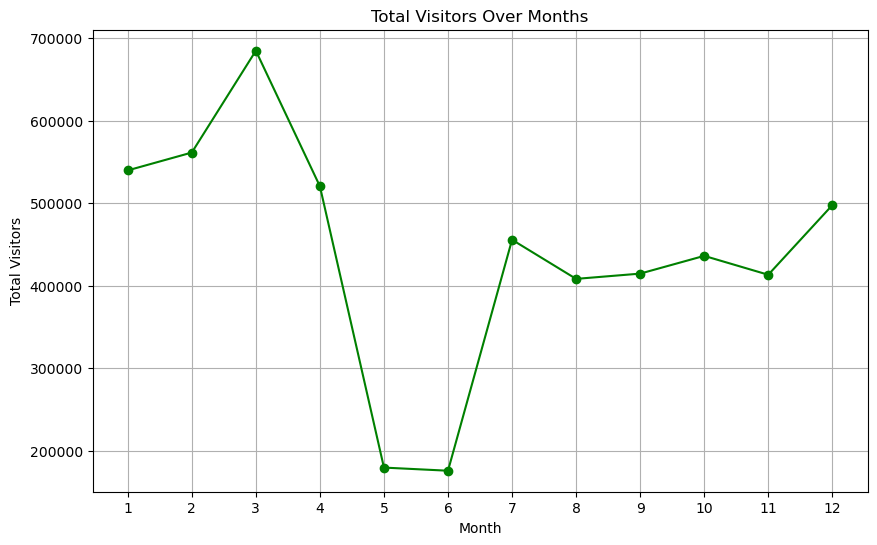

In [83]:
# Line Plot of Visitors Over Months
plt.figure(figsize=(10, 6))
data['tra'].groupby('month')['visitors'].sum().plot(marker='o', color='green', linestyle='-')
plt.title('Total Visitors Over Months')
plt.xlabel('Month')
plt.ylabel('Total Visitors')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

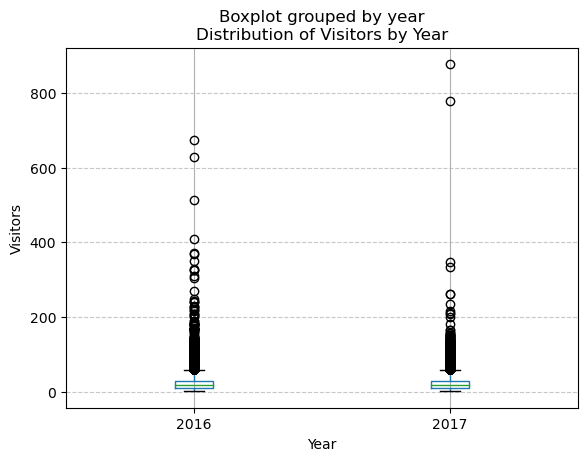

In [84]:
# Box Plot of Visitors by Year
plt.figure(figsize=(10, 6))
data['tra'].boxplot(column='visitors', by='year')
plt.title('Distribution of Visitors by Year')
plt.xlabel('Year')
plt.ylabel('Visitors')
plt.xticks([1, 2], ['2016', '2017'])  # Adjust x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1200x800 with 0 Axes>

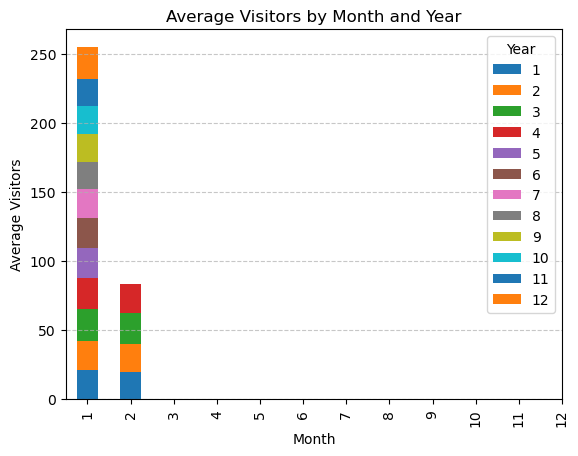

In [85]:
# Bar Plot of Average Visitors by Month and Year
plt.figure(figsize=(12, 8))
data['tra'].groupby(['year', 'month'])['visitors'].mean().unstack().plot(kind='bar', stacked=True)
plt.title('Average Visitors by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Visitors')
plt.xticks(range(0, len(data['tra']['month'].unique())), data['tra']['month'].unique())
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [86]:
# Load the DataFrames from the CSV files
hr_df = pd.read_csv('hpg_reserve.csv.zip')
ar_df = pd.read_csv('air_reserve.csv.zip')
id_df = pd.read_csv('store_id_relation.csv.zip')
# Merge 'hr' and 'id' DataFrames on 'hpg_store_id' and 'air_store_id' respectively
merged_ar = pd.merge(ar_df, id_df, on='air_store_id', how='inner')
merged_hr = pd.merge(hr_df, id_df, on='hpg_store_id', how='inner')


In [87]:
# Combine the merged DataFrames
combined_df = pd.concat([merged_ar, merged_hr], ignore_index=True)

# Display the combined DataFrame
print(combined_df.head())

           air_store_id       visit_datetime     reserve_datetime  \
0  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00   
1  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00   
2  air_db4b38ebe7a7ceff  2016-01-06 18:00:00  2016-01-06 17:00:00   
3  air_db4b38ebe7a7ceff  2016-01-09 19:00:00  2016-01-09 16:00:00   
4  air_db4b38ebe7a7ceff  2016-01-09 23:00:00  2016-01-09 23:00:00   

   reserve_visitors          hpg_store_id  
0                 3  hpg_bcecaa70222d94e5  
1                 6  hpg_bcecaa70222d94e5  
2                 3  hpg_bcecaa70222d94e5  
3                 2  hpg_bcecaa70222d94e5  
4                 1  hpg_bcecaa70222d94e5  


In [88]:
combined_df

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_store_id
0,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,hpg_bcecaa70222d94e5
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,hpg_bcecaa70222d94e5
2,air_db4b38ebe7a7ceff,2016-01-06 18:00:00,2016-01-06 17:00:00,3,hpg_bcecaa70222d94e5
3,air_db4b38ebe7a7ceff,2016-01-09 19:00:00,2016-01-09 16:00:00,2,hpg_bcecaa70222d94e5
4,air_db4b38ebe7a7ceff,2016-01-09 23:00:00,2016-01-09 23:00:00,1,hpg_bcecaa70222d94e5
...,...,...,...,...,...
64442,air_84f6876ff7e83ae7,2017-04-01 21:00:00,2017-03-10 20:00:00,2,hpg_0f78ef8d1e4b23d8
64443,air_84f6876ff7e83ae7,2017-04-02 17:00:00,2017-04-02 14:00:00,2,hpg_0f78ef8d1e4b23d8
64444,air_84f6876ff7e83ae7,2017-04-08 19:00:00,2017-04-03 12:00:00,3,hpg_0f78ef8d1e4b23d8
64445,air_84f6876ff7e83ae7,2017-04-08 20:00:00,2017-03-09 07:00:00,4,hpg_0f78ef8d1e4b23d8


In [89]:
# Extracting day of the week, year, month, and date
combined_df['visit_datetime'] = pd.to_datetime(combined_df['visit_datetime'])
combined_df['year'] = combined_df['visit_datetime'].dt.year
combined_df['dayofweek'] = combined_df['visit_datetime'].dt.dayofweek
combined_df['date'] = combined_df['visit_datetime'].dt.date

combined_df.head(20)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_store_id,year,dayofweek,date
0,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,hpg_bcecaa70222d94e5,2016,4,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,hpg_bcecaa70222d94e5,2016,4,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-06 18:00:00,2016-01-06 17:00:00,3,hpg_bcecaa70222d94e5,2016,2,2016-01-06
3,air_db4b38ebe7a7ceff,2016-01-09 19:00:00,2016-01-09 16:00:00,2,hpg_bcecaa70222d94e5,2016,5,2016-01-09
4,air_db4b38ebe7a7ceff,2016-01-09 23:00:00,2016-01-09 23:00:00,1,hpg_bcecaa70222d94e5,2016,5,2016-01-09
5,air_db4b38ebe7a7ceff,2016-01-10 00:00:00,2016-01-09 21:00:00,1,hpg_bcecaa70222d94e5,2016,6,2016-01-10
6,air_db4b38ebe7a7ceff,2016-01-10 18:00:00,2016-01-10 17:00:00,5,hpg_bcecaa70222d94e5,2016,6,2016-01-10
7,air_db4b38ebe7a7ceff,2016-01-12 17:00:00,2016-01-12 17:00:00,9,hpg_bcecaa70222d94e5,2016,1,2016-01-12
8,air_db4b38ebe7a7ceff,2016-01-12 21:00:00,2016-01-12 21:00:00,1,hpg_bcecaa70222d94e5,2016,1,2016-01-12
9,air_db4b38ebe7a7ceff,2016-01-14 19:00:00,2016-01-14 17:00:00,2,hpg_bcecaa70222d94e5,2016,3,2016-01-14


In [90]:
combined_df

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_store_id,year,dayofweek,date
0,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,hpg_bcecaa70222d94e5,2016,4,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,hpg_bcecaa70222d94e5,2016,4,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-06 18:00:00,2016-01-06 17:00:00,3,hpg_bcecaa70222d94e5,2016,2,2016-01-06
3,air_db4b38ebe7a7ceff,2016-01-09 19:00:00,2016-01-09 16:00:00,2,hpg_bcecaa70222d94e5,2016,5,2016-01-09
4,air_db4b38ebe7a7ceff,2016-01-09 23:00:00,2016-01-09 23:00:00,1,hpg_bcecaa70222d94e5,2016,5,2016-01-09
...,...,...,...,...,...,...,...,...
64442,air_84f6876ff7e83ae7,2017-04-01 21:00:00,2017-03-10 20:00:00,2,hpg_0f78ef8d1e4b23d8,2017,5,2017-04-01
64443,air_84f6876ff7e83ae7,2017-04-02 17:00:00,2017-04-02 14:00:00,2,hpg_0f78ef8d1e4b23d8,2017,6,2017-04-02
64444,air_84f6876ff7e83ae7,2017-04-08 19:00:00,2017-04-03 12:00:00,3,hpg_0f78ef8d1e4b23d8,2017,5,2017-04-08
64445,air_84f6876ff7e83ae7,2017-04-08 20:00:00,2017-03-09 07:00:00,4,hpg_0f78ef8d1e4b23d8,2017,5,2017-04-08


In [94]:
# Assuming df is your DataFrame and 'visit_datetime' is a datetime column
combined_df['visit_datetime'] = pd.to_datetime(combined_df['visit_datetime'])

# Extracting year, day of the week, month, date, and time
combined_df['year'] = combined_df['visit_datetime'].dt.year
combined_df['dow'] = combined_df['visit_datetime'].dt.dayofweek
combined_df['month'] = combined_df['visit_datetime'].dt.month

# Display the DataFrame with extracted columns
print(combined_df.head())

           air_store_id      visit_datetime     reserve_datetime  \
0  air_db4b38ebe7a7ceff 2016-01-01 19:00:00  2016-01-01 19:00:00   
1  air_db4b38ebe7a7ceff 2016-01-01 19:00:00  2016-01-01 19:00:00   
2  air_db4b38ebe7a7ceff 2016-01-06 18:00:00  2016-01-06 17:00:00   
3  air_db4b38ebe7a7ceff 2016-01-09 19:00:00  2016-01-09 16:00:00   
4  air_db4b38ebe7a7ceff 2016-01-09 23:00:00  2016-01-09 23:00:00   

   reserve_visitors          hpg_store_id  year  dayofweek        date  dow  \
0                 3  hpg_bcecaa70222d94e5  2016          4  2016-01-01    4   
1                 6  hpg_bcecaa70222d94e5  2016          4  2016-01-01    4   
2                 3  hpg_bcecaa70222d94e5  2016          2  2016-01-06    2   
3                 2  hpg_bcecaa70222d94e5  2016          5  2016-01-09    5   
4                 1  hpg_bcecaa70222d94e5  2016          5  2016-01-09    5   

   month      time  
0      1  19:00:00  
1      1  19:00:00  
2      1  18:00:00  
3      1  19:00:00  
4      1  2

In [95]:
combined_df

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_store_id,year,dayofweek,date,dow,month,time
0,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,hpg_bcecaa70222d94e5,2016,4,2016-01-01,4,1,19:00:00
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,hpg_bcecaa70222d94e5,2016,4,2016-01-01,4,1,19:00:00
2,air_db4b38ebe7a7ceff,2016-01-06 18:00:00,2016-01-06 17:00:00,3,hpg_bcecaa70222d94e5,2016,2,2016-01-06,2,1,18:00:00
3,air_db4b38ebe7a7ceff,2016-01-09 19:00:00,2016-01-09 16:00:00,2,hpg_bcecaa70222d94e5,2016,5,2016-01-09,5,1,19:00:00
4,air_db4b38ebe7a7ceff,2016-01-09 23:00:00,2016-01-09 23:00:00,1,hpg_bcecaa70222d94e5,2016,5,2016-01-09,5,1,23:00:00
...,...,...,...,...,...,...,...,...,...,...,...
64442,air_84f6876ff7e83ae7,2017-04-01 21:00:00,2017-03-10 20:00:00,2,hpg_0f78ef8d1e4b23d8,2017,5,2017-04-01,5,4,21:00:00
64443,air_84f6876ff7e83ae7,2017-04-02 17:00:00,2017-04-02 14:00:00,2,hpg_0f78ef8d1e4b23d8,2017,6,2017-04-02,6,4,17:00:00
64444,air_84f6876ff7e83ae7,2017-04-08 19:00:00,2017-04-03 12:00:00,3,hpg_0f78ef8d1e4b23d8,2017,5,2017-04-08,5,4,19:00:00
64445,air_84f6876ff7e83ae7,2017-04-08 20:00:00,2017-03-09 07:00:00,4,hpg_0f78ef8d1e4b23d8,2017,5,2017-04-08,5,4,20:00:00


In [97]:
groupedData2 = combined_df.groupby('dow')['reserve_visitors'].transform('mean')

In [99]:
print(groupedData2)

0        4.797676
1        4.797676
2        4.733710
3        4.244180
4        4.244180
           ...   
64442    4.244180
64443    4.160714
64444    4.244180
64445    4.244180
64446    4.797676
Name: reserve_visitors, Length: 64447, dtype: float64


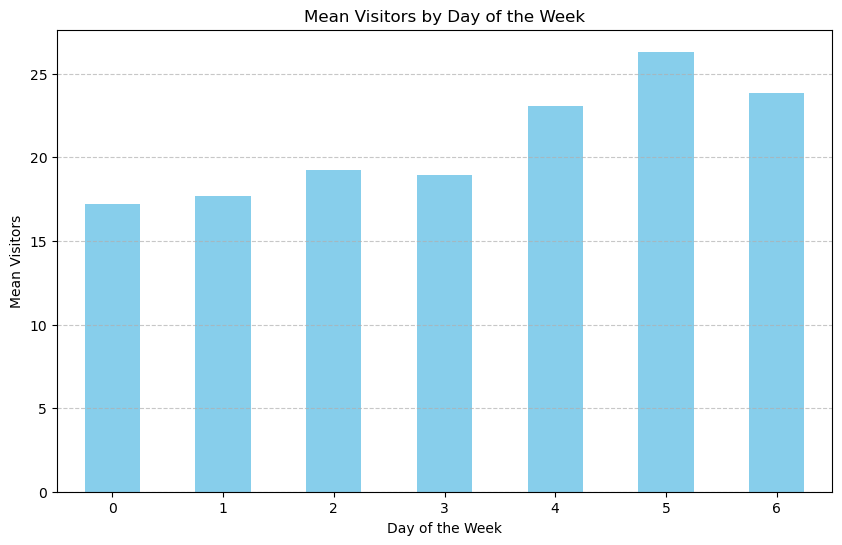

In [101]:
combined_df_mean_visitors_by_dow = combined_df.groupby('dow')['reserve_visitors'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_visitors_by_dow.plot(kind='bar', color='skyblue')
plt.title('Mean Visitors by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Visitors')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

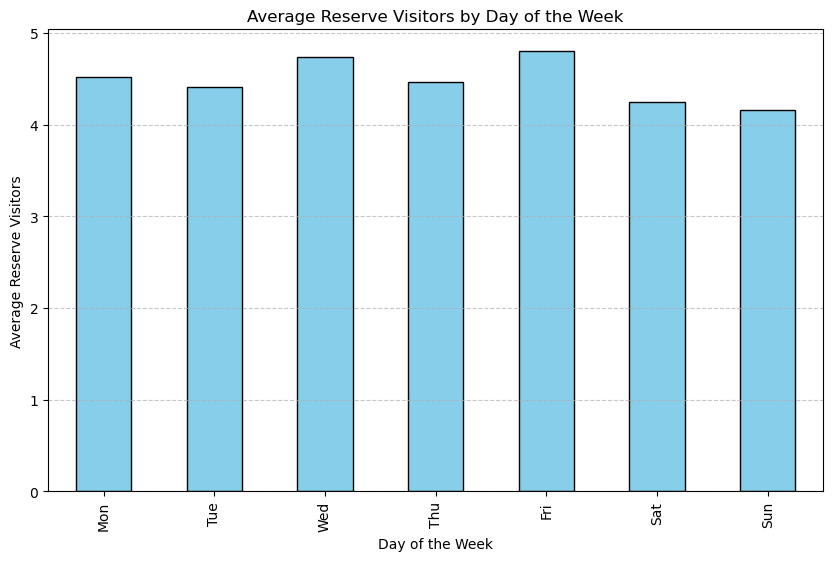

In [102]:
# Average Reserve Visitors by Day of the Week
plt.figure(figsize=(10, 6))
avg_visitors_dow = combined_df.groupby('dow')['reserve_visitors'].mean()
avg_visitors_dow.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Reserve Visitors by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Reserve Visitors')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

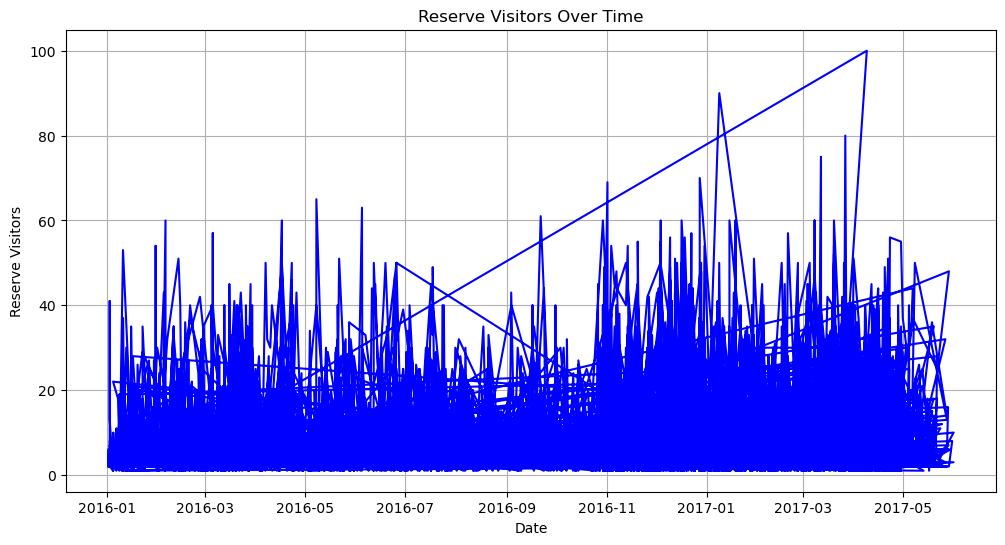

In [105]:
# Time Series Plot of Reserve Visitors Over Time
plt.figure(figsize=(12, 6))
plt.plot(combined_df['visit_datetime'], combined_df['reserve_visitors'], color='blue')
plt.title('Reserve Visitors Over Time')
plt.xlabel('Date')
plt.ylabel('Reserve Visitors')
plt.grid(True)
plt.show()

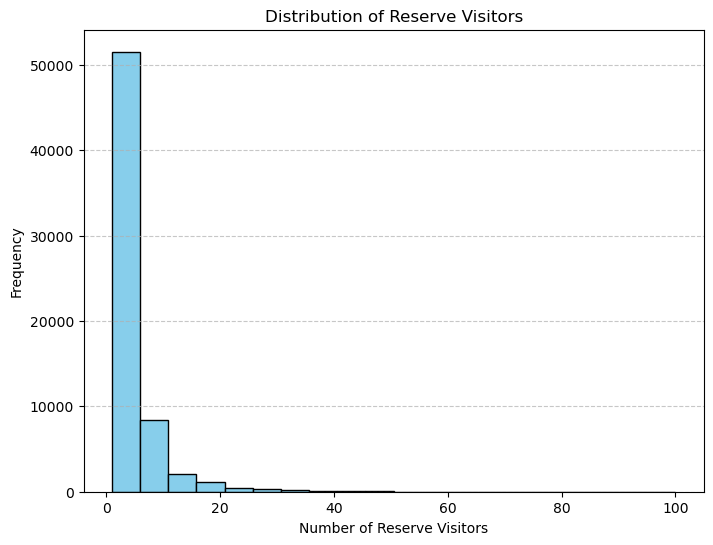

In [106]:
# Histogram of Reserve Visitors
plt.figure(figsize=(8, 6))
plt.hist(combined_df['reserve_visitors'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Reserve Visitors')
plt.xlabel('Number of Reserve Visitors')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()